<img src='11.jpg'>

In [2]:
#pip install pycaret

In [3]:
import pandas as pd

In [4]:
#Regression AutoMl

In [5]:
from pycaret.regression import*

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [8]:
setup(data=df,target='Age')

,Description,Value
0,Session id,1131
1,Target,Age
2,Target type,Regression
3,Original data shape,"(74051, 10)"
4,Transformed data shape,"(74051, 12)"
5,Transformed train set shape,"(51835, 12)"
6,Transformed test set shape,"(22216, 12)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [9]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.4000,4.1692,2.0415,0.5865,0.1616,0.1361,1.1340
gbr,Gradient Boosting Regressor,1.4174,4.2301,2.0564,0.5805,0.1628,0.1379,7.9950
xgboost,Extreme Gradient Boosting,1.4242,4.3262,2.0797,0.5709,0.1644,0.1383,0.7740
rf,Random Forest Regressor,1.4558,4.3891,2.0947,0.5646,0.1671,0.1428,28.1940
et,Extra Trees Regressor,1.4613,4.4134,2.1005,0.5622,0.1677,0.1434,12.7800
lr,Linear Regression,1.4782,4.5030,2.1218,0.5534,0.1691,0.1444,0.7070
ridge,Ridge Regression,1.4782,4.5029,2.1218,0.5534,0.1691,0.1444,0.1460
lar,Least Angle Regression,1.4782,4.5030,2.1218,0.5534,0.1691,0.1444,0.1450
br,Bayesian Ridge,1.4782,4.5030,2.1218,0.5534,0.1691,0.1444,0.1670
en,Elastic Net,1.6467,5.4069,2.3250,0.4639,0.1909,0.1667,0.2080


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [10]:
df.corr()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Length,0.000165,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


In [11]:
df.Sex.value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [12]:
df["Sex"]=df["Sex"].replace(["M"],"2")
df["Sex"]=df["Sex"].replace(["I"],"1")
df["Sex"]=df["Sex"].replace(["F"],"0")

In [13]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,1,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [15]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [17]:
x=df.drop(['id','Age'],axis=1)
y=df['Age']

In [18]:
x["Sex"]=x["Sex"].astype("float")

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  float64
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
dtypes: float64(8)
memory usage: 4.5 MB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model=Sequential()
model.add(Dense(120,activation="relu"))
model.add(Dense(120,activation="relu"))
model.add(Dense(120,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))#activation u sildik dikkat otomatik regression oldu
model.compile(loss="mse",optimizer="adam")

In [38]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=50,verbose=1)

Epoch 1/100
1185/1185 [==============================] - 9s 7ms/step - loss: 4.2779 - val_loss: 4.2523
Epoch 2/100
1185/1185 [==============================] - 6s 5ms/step - loss: 4.2868 - val_loss: 4.3747
Epoch 3/100
1185/1185 [==============================] - 9s 8ms/step - loss: 4.3007 - val_loss: 4.2732
Epoch 4/100
1185/1185 [==============================] - 6s 5ms/step - loss: 4.2979 - val_loss: 4.2718
Epoch 5/100
1185/1185 [==============================] - 7s 6ms/step - loss: 4.3045 - val_loss: 4.2532
Epoch 6/100
1185/1185 [==============================] - 6s 5ms/step - loss: 4.2885 - val_loss: 4.2834
Epoch 7/100
1185/1185 [==============================] - 7s 6ms/step - loss: 4.2934 - val_loss: 4.3180
Epoch 8/100
1185/1185 [==============================] - 7s 6ms/step - loss: 4.2909 - val_loss: 4.2565
Epoch 9/100
1185/1185 [==============================] - 6s 5ms/step - loss: 4.2871 - val_loss: 4.2992
Epoch 10/100
1185/1185 [==============================] - 8s 7ms/step - l

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 120)               1080      
                                                                 
 dense_19 (Dense)            (None, 120)               14520     
                                                                 
 dense_20 (Dense)            (None, 120)               14520     
                                                                 
 dense_21 (Dense)            (None, 16)                1936      
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32201 (125.79 KB)
Trainable params: 3220

In [40]:
model.evaluate(x_test,y_test)

463/463 [==============================] - 1s 2ms/step - loss: 4.2223


4.222320556640625

In [41]:
tahmin=model.predict(x_test)

463/463 [==============================] - 1s 2ms/step


In [42]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

In [43]:
r2_score(tahmin,y_test)

0.3441680706287301

In [44]:
(mean_squared_error(y_test,tahmin))**0.5

2.0548287409917463

<Axes: >

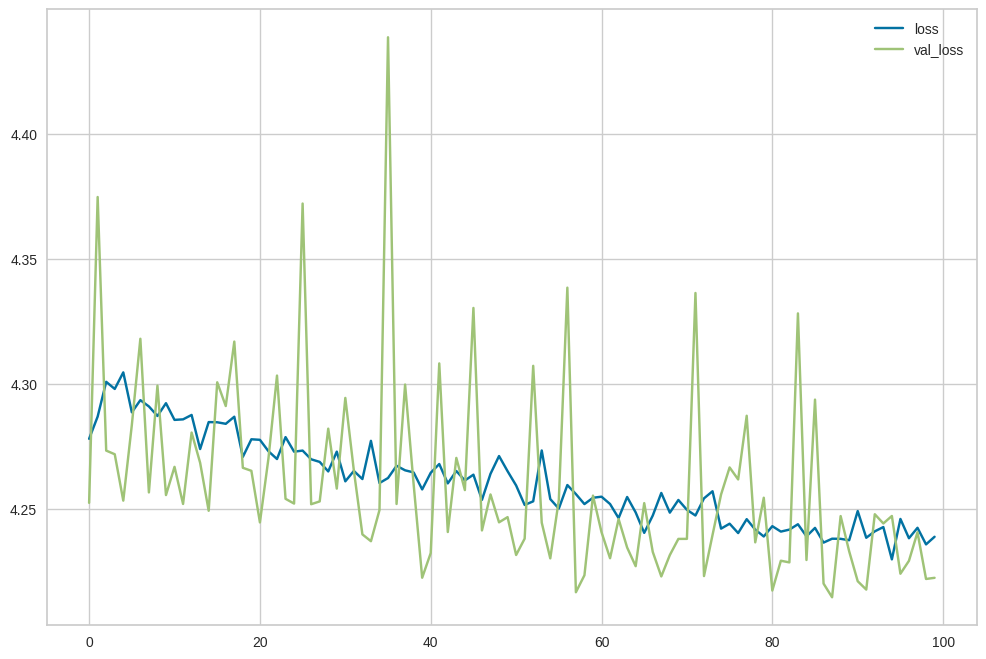

In [45]:
loss_df=pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

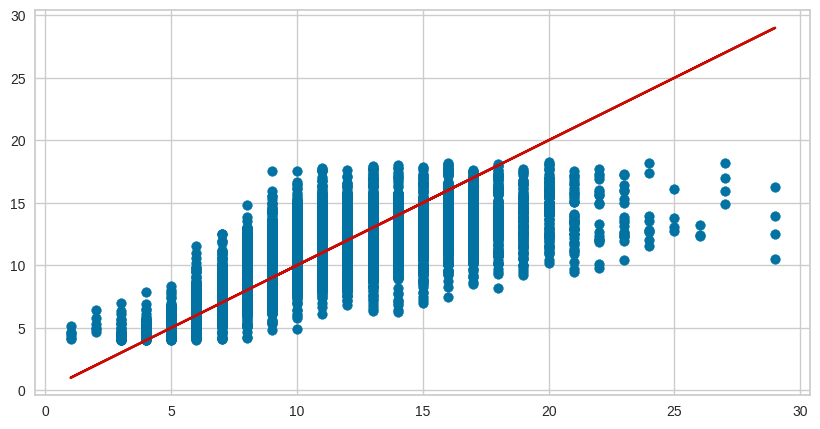

In [48]:
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,"r")